In [1]:
import numpy as np
np.random.seed(42)
m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1) #polynomial data set with some gaussian noise
n = 2 #polynomial degree

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=n, include_bias=False) #class to transform polynomial into one of degree 2
X_poly = poly_features.fit_transform(X) # takes the each value in vector X as the input x, calculates X^2 and X to make quadratic
X[0]
X_poly[0] # == (X, X^2)

array([-1.25459881,  1.57401818])

In [13]:
from sklearn.linear_model import ElasticNet
# alpha fine-tunes how much the weights (from both Lasso and Ridge) contribute to the cost function
# l1_ratio=0.4 means 40% of the emphasis for regularization goes to Lasso, and 60% goes to Ridge
elastic_net = ElasticNet(alpha=3, l1_ratio=0.4)
elastic_net.fit(X_poly, y)
elastic_net.intercept_, elastic_net.coef_

(array([2.8439061]), array([0.70233259, 0.45086822]))

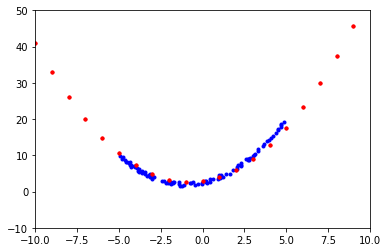

In [14]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
for i in range(-10, 10):
    predict_poly_features = PolynomialFeatures(degree=n, include_bias=False)
    predict_poly = predict_poly_features.fit_transform([[i]])
    valueVec = np.full((1, n), i) #creates an n x 1 array of value i
    plt.plot(valueVec, elastic_net.predict(predict_poly), "r.")
plt.axis([-10, 10, -10, 50])
plt.show()

In [ ]:
# notice that the elastic net points are slightly off from data
# this is just trying to demonstrate that the model works. In reality, alpha should be smaller.